<a href="https://colab.research.google.com/github/giancarlohc/Applied-AI-in-Transportation/blob/svavar/Project/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Processing


## 1.1 Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install researchpy calmap
import researchpy as rp
import calmap

url = "https://raw.githubusercontent.com/giancarlohc/Applied-AI-in-Transportation/main/ProjectAssignmentData/Dataset-PT.csv"
dataset = pd.read_csv(url,skiprows=[0])

## 1.2 Data Exploration

In [ ]:
dataset

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545098,20220630,4,41362,23,344,13,74,44,341,12,...,0,0,0,0,1,1,0,0,0,1
545099,20220630,4,41362,24,330,15,34,92,344,12,...,0,0,0,0,1,1,0,0,0,1
545100,20220630,4,41362,25,339,17,63,43,330,12,...,0,0,0,0,1,1,0,0,0,1
545101,20220630,4,41362,26,331,0,35,58,339,12,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
np.mean(dataset)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([2.70000e+01, 0.00000e+00, 1.00000e+00, 7.00000e+01, 1.18000e+02,
        4.97970e+04, 4.70278e+05, 2.39390e+04, 7.75000e+02, 9.80000e+01]),
 array([-3493., -2918., -2343., -1768., -1193.,  -618.,   -43.,   532.,
         1107.,  1682.,  2257.]),
 <BarContainer object of 10 artists>)

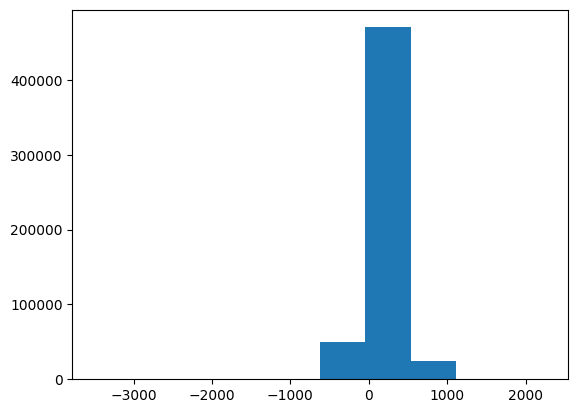

In [ ]:
plt.hist(dataset["arrival_delay"])

<Axes: >

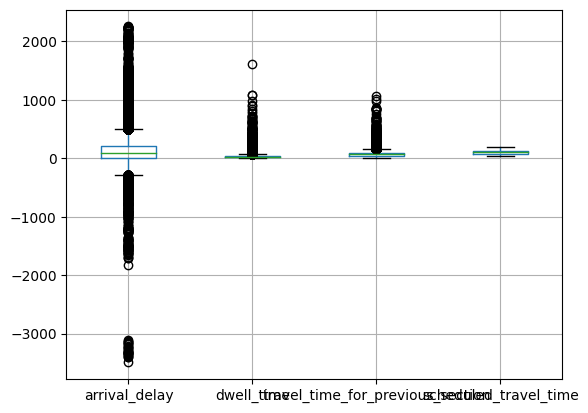

In [ ]:
dataset.boxplot(column=["arrival_delay","dwell_time","travel_time_for_previous_section","scheduled_travel_time"])

<Axes: >

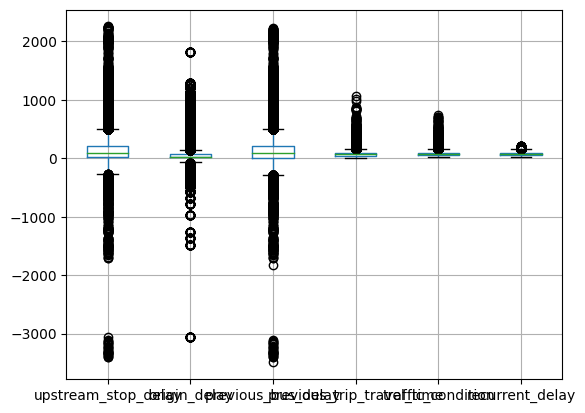

In [ ]:
dataset.boxplot(column=["upstream_stop_delay","origin_delay","previous_bus_delay","previous_trip_travel_time","traffic_condition","recurrent_delay"])

In [ ]:
np.unique(dataset.isna())

array([False])

In [ ]:
correlation_matrix = dataset[["arrival_delay","dwell_time","travel_time_for_previous_section","scheduled_travel_time","upstream_stop_delay","origin_delay","previous_bus_delay","previous_trip_travel_time","traffic_condition","recurrent_delay"]].corr()

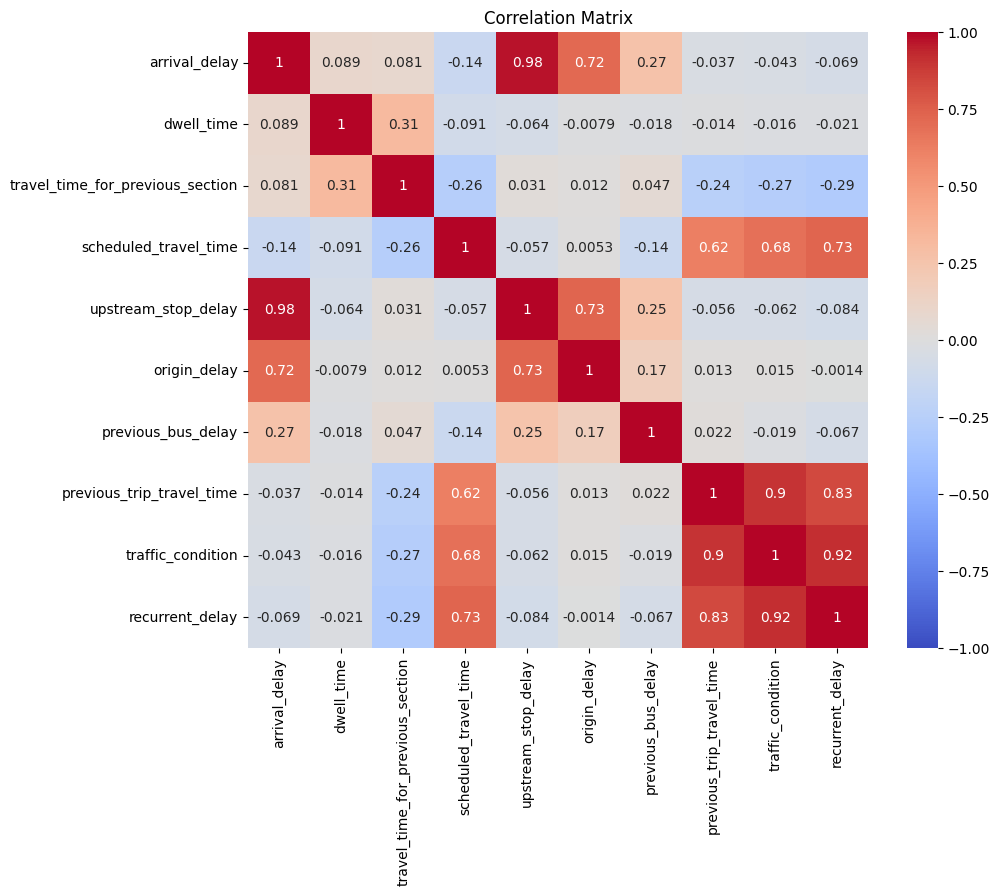

In [ ]:
plt.figure(figsize=(10, 8))  # Set figure size for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
rp.summary_cat(dataset[["weather", "temperature","day_of_week","time_of_day"]])

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,weather,Normal,514971,94.47
1,,Light Rain,13338,2.45
2,,Light Snow,9720,1.78
3,,Snow,3699,0.68
4,,Rain,3375,0.62
5,temperature,Normal,473877,86.93
6,,Cold,61452,11.27
7,,Extra cold,9774,1.79
8,day_of_week,weekday,418149,76.71
9,,weekend,126954,23.29


(array([76788., 43956., 55863., 56403., 48384., 65988., 31509., 84672.,
        11340., 70200.]),
 array([20220108. , 20220160.2, 20220212.4, 20220264.6, 20220316.8,
        20220369. , 20220421.2, 20220473.4, 20220525.6, 20220577.8,
        20220630. ]),
 <BarContainer object of 10 artists>)

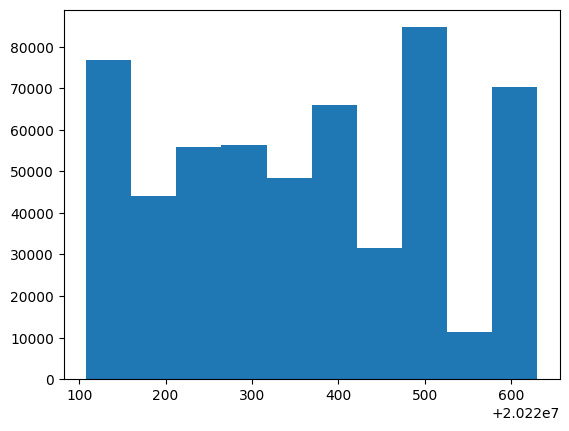

In [ ]:
plt.hist(dataset["Calendar_date"])

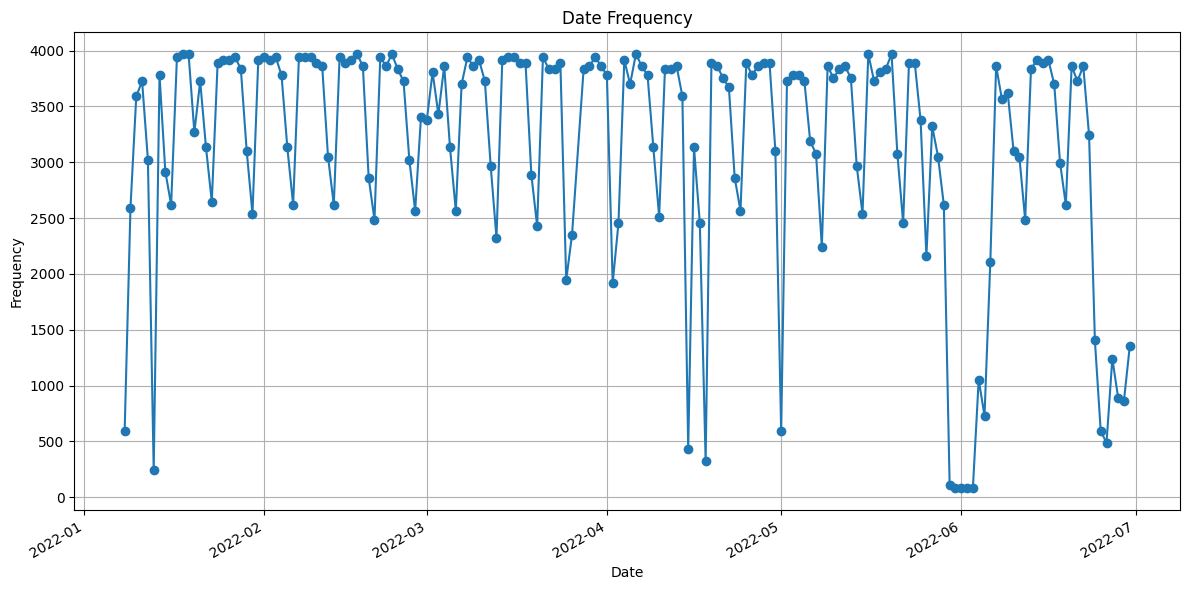

In [ ]:

dates = pd.to_datetime(dataset['Calendar_date'], format='%Y%m%d')

date_frequencies = dates.value_counts().sort_index()

plt.figure(figsize=(12, 6))
date_frequencies.plot(kind='line', linestyle='-', marker='o')
plt.title("Date Frequency")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

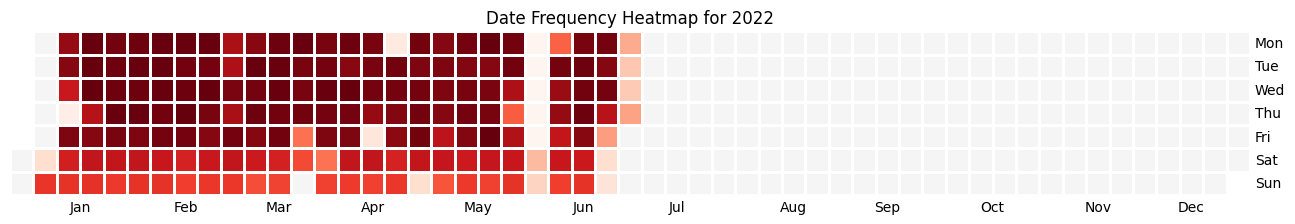

In [ ]:
plt.figure(figsize=(16, 10))
calmap.yearplot(date_frequencies, year=2022)
plt.title("Date Frequency Heatmap for 2022")
plt.show()

In [ ]:
dates

0        2022-01-08
1        2022-01-08
2        2022-01-08
3        2022-01-08
4        2022-01-08
            ...    
545098   2022-06-30
545099   2022-06-30
545100   2022-06-30
545101   2022-06-30
545102   2022-06-30
Name: Calendar_date, Length: 545103, dtype: datetime64[ns]

In [ ]:
dataset[0:5]['scheduled_travel_time'].sum()/60

6.433333333333334

## 1.3 Creation of Training Datasets

### 1.3.1 Creation of Datasets with 1,5,10,15,20 Stop Prediction

In [ ]:
count = 0
for k in set(dataset['Calendar_date']):
  buses = set(dataset[dataset["Calendar_date"]==k]["bus_id"])
  for j in buses:
    for i in range(0,len(buses)+1):
      #print(dataset[dataset["stop_sequence"]==i-5]])
      #print(k,j,i)
      count += 1

print(count)
#this ias wront because it doesnt take into account bus uturning, the bus should instead have its arrival values offset for the bus_id on each day

112864


In [ ]:
buses

{41345, 41362, 41364, 41365, 41730, 41731, 41732, 44057, 44064}

In [ ]:
for i in range(1,28):
  print(len(dataset[dataset["stop_sequence"]==i]))

20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189
20189


In [ ]:
len(set(dataset["bus_id"]))

152

### 1.3.2 Normalizing and Balancing the Datasets

### 1.3.3 Splitting the Datasets into Training and Test 80/20%

# 2. Model Creation

## 2.1 Model Training

### 2.1.1 Model Training Module 3 - Classification Models

### 2.1.2 Model Training Module 5 - Clustering Models

### 2.1.3  Model Training Module 6 - Do we need to make Reduction?

### 2.1.4 Model Training Module 7 - Nural Network Models

## 2.2 Model Evaluation

What type of model is the best performer?

# 3. Model Optimization

Optimization of the parameters of the best performing model type.